In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
#upload = files.upload()
data = pd.read_csv('/content/Breast_Cancer 1.csv')
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,Beningn,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
data.isna().any()

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [ ]:
from google.colab import files
#upload = files.upload()
df = pd.read_csv('/content/Breast_Cancer.csv')
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,2,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
upper_limit = df['perimeter_mean'].mean() + 3*df['perimeter_mean'].std()
lower_limit = df['perimeter_mean'].mean() - 3*df['perimeter_mean'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

new_df = df.loc[(df['perimeter_mean'] <= upper_limit) & (df['perimeter_mean'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['perimeter_mean']>upper_limit), 'perimeter_mean'] = upper_limit
new_df.loc[(new_df['perimeter_mean']<lower_limit), 'perimeter_mean'] = lower_limit

upper limit: 164.86597650818032
lower limit: 19.07209027565095
before removing outliers: 569
after removing outliers: 562
outliers: 7


In [ ]:
upper_limit = df['area_mean'].mean() + 3*df['area_mean'].std()
lower_limit = df['area_mean'].mean() - 3*df['area_mean'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

new_df = df.loc[(df['area_mean'] <= upper_limit) & (df['area_mean'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['area_mean']>upper_limit), 'area_mean'] = upper_limit
new_df.loc[(new_df['area_mean']<lower_limit), 'area_mean'] = lower_limit

upper limit: 1710.6314912356436
lower limit: -400.8532838542726
before removing outliers: 569
after removing outliers: 561
outliers: 8


In [ ]:
upper_limit = df['texture_se'].mean() + 3*df['texture_se'].std()
lower_limit = df['area_mean'].mean() - 3*df['area_mean'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

new_df = df.loc[(df['texture_se'] <= upper_limit) & (df['texture_se'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['texture_se']>upper_limit), 'texture_se'] = upper_limit
new_df.loc[(new_df['texture_se']<lower_limit), 'texture_se'] = lower_limit

upper limit: 2.8717986049166333
lower limit: -400.8532838542726
before removing outliers: 569
after removing outliers: 560
outliers: 9


In [ ]:
upper_limit = df['symmetry_se'].mean() + 3*df['symmetry_se'].std()
lower_limit = df['symmetry_se'].mean() - 3*df['symmetry_se'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

new_df = df.loc[(df['symmetry_se'] <= upper_limit) & (df['symmetry_se'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['symmetry_se']>upper_limit), 'symmetry_se'] = upper_limit
new_df.loc[(new_df['symmetry_se']<lower_limit), 'symmetry_se'] = lower_limit

upper limit: 0.06404797808382029
lower limit: -0.022013398118969664
before removing outliers: 569
after removing outliers: 567
outliers: 2


In [ ]:
upper_limit = df['texture_worst'].mean() + 3*df['texture_worst'].std()
lower_limit = df['texture_worst'].mean() - 3*df['texture_worst'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

new_df = df.loc[(df['texture_worst'] <= upper_limit) & (df['texture_worst'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['texture_worst']>upper_limit), 'texture_worst'] = upper_limit
new_df.loc[(new_df['texture_worst']<lower_limit), 'texture_worst'] = lower_limit

upper limit: 44.11599606770899
lower limit: 7.238450329479058
before removing outliers: 569
after removing outliers: 565
outliers: 4


In [ ]:
upper_limit = df['smoothness_worst'].mean() + 3*df['smoothness_worst'].std()
lower_limit = df['smoothness_worst'].mean() - 3*df['smoothness_worst'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

new_df = df.loc[(df['smoothness_worst'] <= upper_limit) & (df['smoothness_worst'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['smoothness_worst']>upper_limit), 'smoothness_worst'] = upper_limit
new_df.loc[(new_df['smoothness_worst']<lower_limit), 'smoothness_worst'] = lower_limit

upper limit: 0.20086588223911095
lower limit: 0.0638713058100982
before removing outliers: 569
after removing outliers: 566
outliers: 3


In [ ]:
upper_limit = df['smoothness_mean'].mean() + 3*df['smoothness_mean'].std()
lower_limit = df['smoothness_mean'].mean() - 3*df['smoothness_mean'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

new_df = df.loc[(df['smoothness_mean'] <= upper_limit) & (df['smoothness_mean'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['smoothness_mean']>upper_limit), 'smoothness_mean'] = upper_limit
new_df.loc[(new_df['smoothness_mean']<lower_limit), 'smoothness_mean'] = lower_limit

upper limit: 0.13855266560809995
lower limit: 0.05416789678205825
before removing outliers: 569
after removing outliers: 564
outliers: 5


In [ ]:
upper_limit = df['texture_mean'].mean() + 3*df['texture_mean'].std()
lower_limit = df['texture_mean'].mean() - 3*df['texture_mean'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

new_df = df.loc[(df['texture_mean'] <= upper_limit) & (df['texture_mean'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['texture_mean']>upper_limit), 'texture_mean'] = upper_limit
new_df.loc[(new_df['texture_mean']<lower_limit), 'texture_mean'] = lower_limit

upper limit: 32.19275581065199
lower limit: 6.386541201650294
before removing outliers: 569
after removing outliers: 565
outliers: 4


In [ ]:
df.shape

(569, 32)

In [ ]:
count = df['diagnosis'].value_counts()
print(count)

diagnosis
2    357
1    212
Name: count, dtype: int64


In [ ]:
# arr = df['diagnosis']
# labels = ['Malignant','beningn']
# plt.pie(arr , labels = labels , explode = [0.2,0.0] , shadow = True)
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

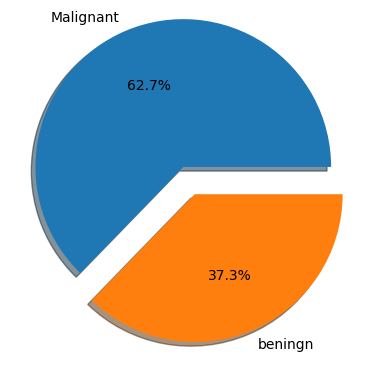

In [ ]:
# prompt: write a code to make a pie chart of diagnosis 2 and 1 labels

plt.pie(count , labels = ['Malignant','beningn'] , explode = [0.2,0.0] , shadow = True , autopct = '%1.1f%%')
# plt.figure(figsize(5,4))
plt.show


<Axes: >

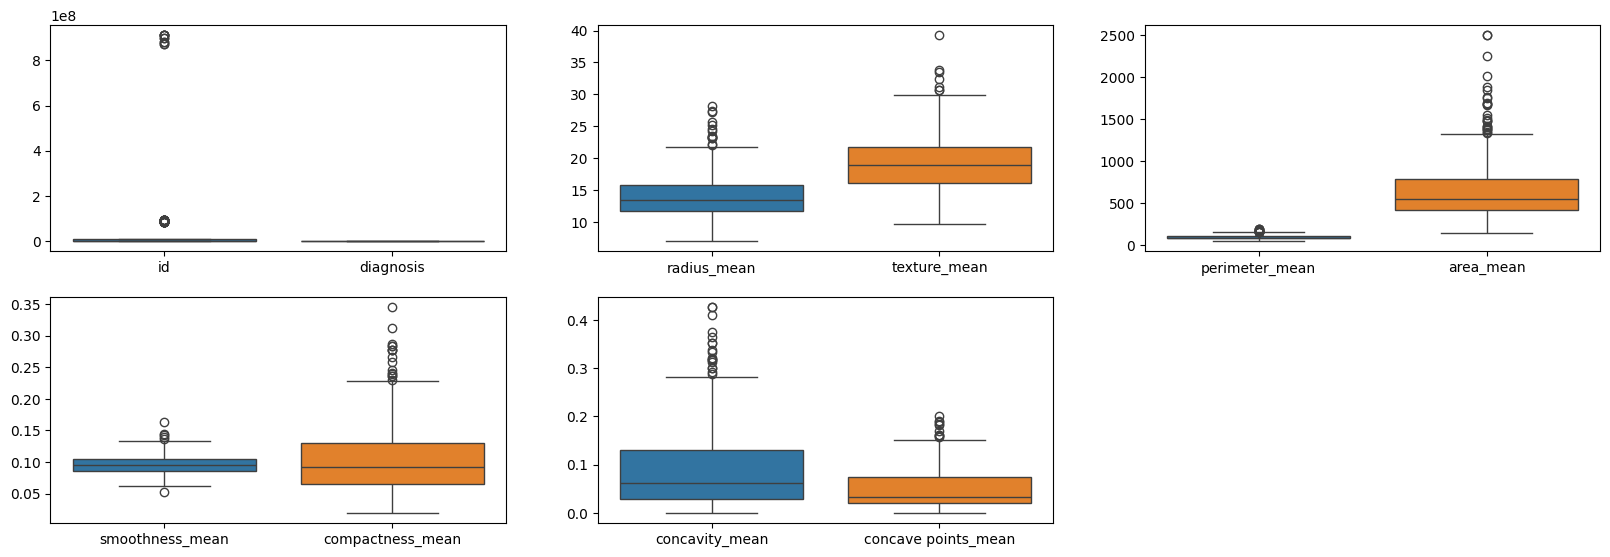

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data = df.iloc[:, 0:2],)

plt.subplot(3,3,2)
sns.boxplot(data = df.iloc[:, 2:4],)

plt.subplot(3,3,3)
sns.boxplot(data = df.iloc[:, 4:6],)

plt.subplot(3,3,4)
sns.boxplot(data = df.iloc[:, 6:8],)


plt.subplot(3,3,5)
sns.boxplot(data = df.iloc[:, 8:10],)

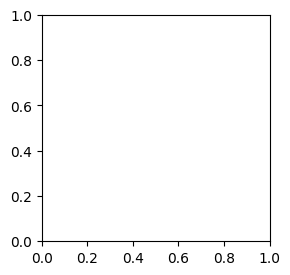

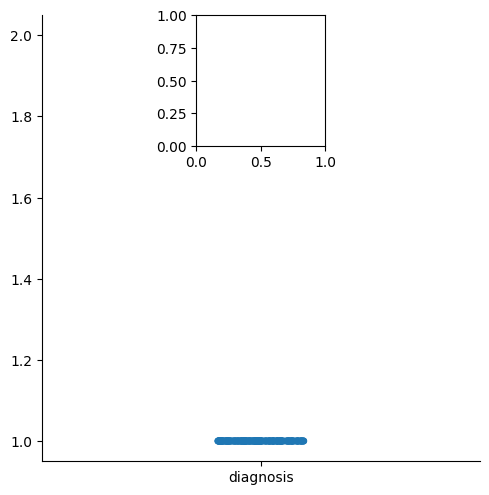

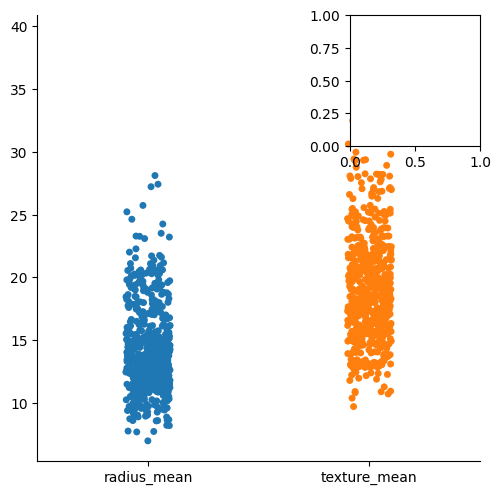

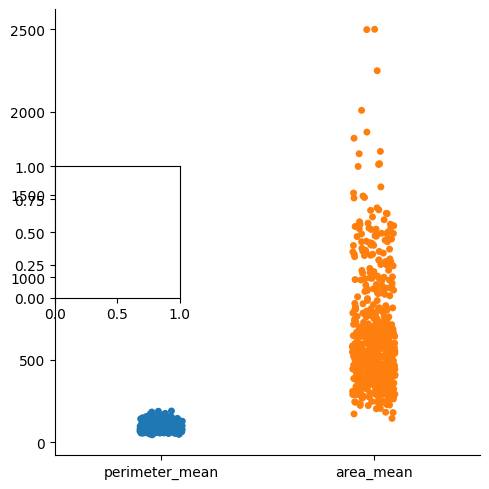

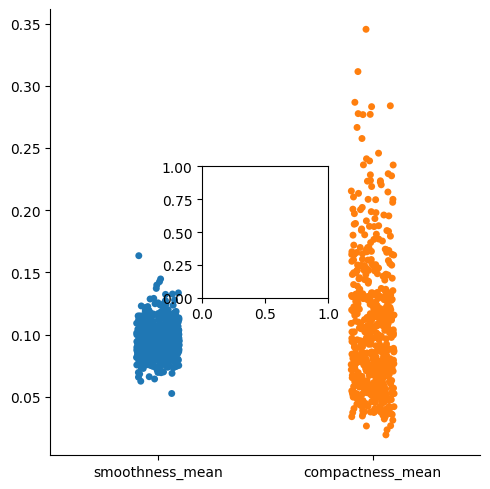

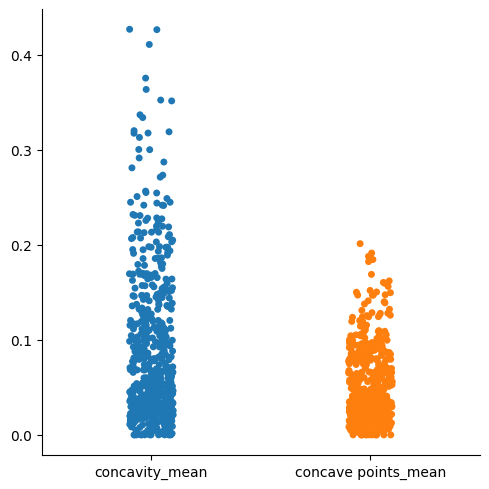

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.catplot(data = df.iloc[:, 1:2],)

plt.subplot(3,3,2)
sns.catplot(data = df.iloc[:, 2:4],)

plt.subplot(3,3,3)
sns.catplot(data = df.iloc[:, 4:6],)

plt.subplot(3,3,4)
sns.catplot(data = df.iloc[:, 6:8],)


plt.subplot(3,3,5)
sns.catplot(data = df.iloc[:, 8:10],)

In [ ]:
upper_limit = df['radius_mean'].mean() + 3*df['radius_mean'].std()
lower_limit = df['radius_mean'].mean() - 3*df['radius_mean'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)



upper limit: 24.699438218530787
lower limit: 3.5551452612583176


In [ ]:
new_df = df.loc[(df['radius_mean'] <= upper_limit) & (df['radius_mean'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 569
after removing outliers: 564
outliers: 5


<Axes: ylabel='radius_mean'>

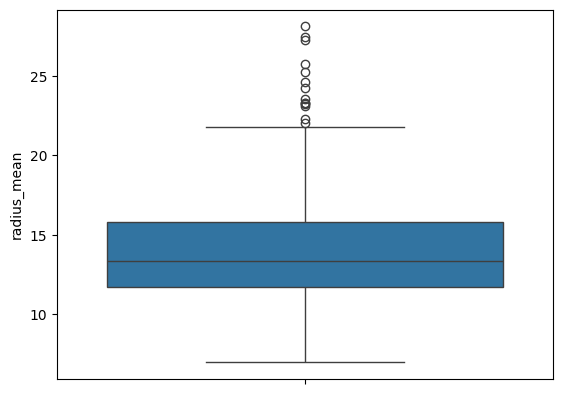

In [ ]:
sns.boxplot(df['radius_mean'])

In [ ]:
new_df = df.copy()
new_df.loc[(new_df['radius_mean']>upper_limit), 'radius_mean'] = upper_limit
new_df.loc[(new_df['radius_mean']<lower_limit), 'radius_mean'] = lower_limit

<Axes: ylabel='radius_mean'>

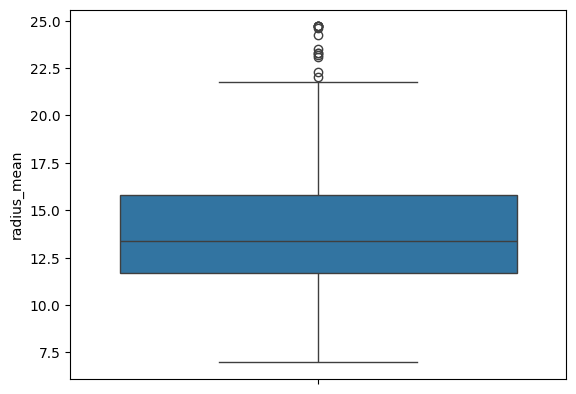

In [ ]:
sns.boxplot(new_df['radius_mean'])

In [ ]:
new_df = df.loc[(df['radius_mean'] <= upper_limit) & (df['radius_mean'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['radius_mean']>upper_limit), 'radius_mean'] = upper_limit
new_df.loc[(new_df['radius_mean']<lower_limit), 'radius_mean'] = lower_limit

before removing outliers: 569
after removing outliers: 564
outliers: 5


<Axes: ylabel='radius_mean'>

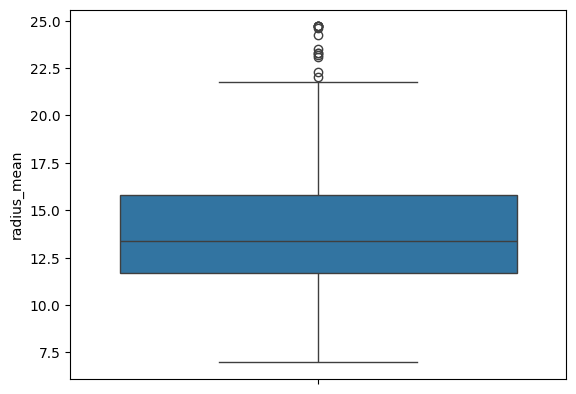

In [ ]:
sns.boxplot(new_df['radius_mean'])

In [ ]:
upper_limit = df["fractal_dimension_mean"].mean() + 3 * df["fractal_dimension_mean"].std()
lower_limit = df["fractal_dimension_mean"].mean() - 3 * df["fractal_dimension_mean"].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

# Filter the DataFrame to remove outliers
filtered_df = df.loc[(df["fractal_dimension_mean"] < upper_limit) & (df["fractal_dimension_mean"] > lower_limit)]

# Print lengths
print("before removing outliers of fractal_dimension_mean:", len(df))
print("after removing outliers of fractal_dimension_mean:", len(filtered_df))
print("number of outliers removed:", len(df) - len(filtered_df))

upper limit:  0.1575476490870937
lower limit:  -0.02946248212751551
before removing outliers of fractal_dimension_mean: 569
after removing outliers of fractal_dimension_mean: 568
number of outliers removed: 1


In [ ]:
upper_limit = df["radius_se"].mean() + 3 * df["radius_se"].std()
lower_limit = df["radius_se"].mean() - 3 * df["radius_se"].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

# Filter the DataFrame to remove outliers
filtered_df = df.loc[(df["radius_se"] < upper_limit) & (df["radius_se"] > lower_limit)]

# Print lengths
print("before removing outliers of radius_se:", len(df))
print("after removing outliers of radius_se:", len(filtered_df))
print("number of outliers removed:", len(df) - len(filtered_df))


upper limit:  1.2373595683672187
lower limit:  -0.42727767030043473
before removing outliers of radius_se: 569
after removing outliers of radius_se: 562
number of outliers removed: 7


count    562.000000
mean      14.038165
std        3.401153
min        6.981000
25%       11.682500
50%       13.280000
75%       15.750000
max       27.220000
Name: radius_mean, dtype: float64


<Axes: ylabel='radius_mean'>

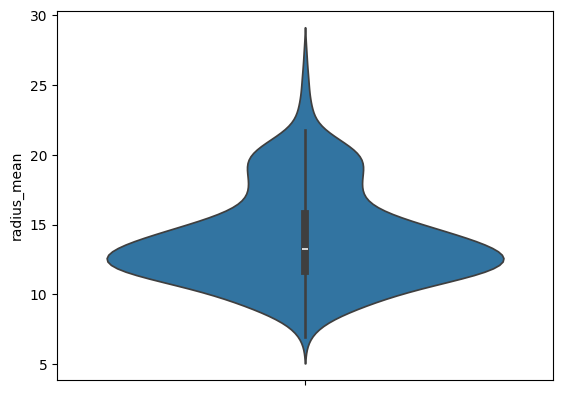

In [ ]:
# Print descriptive statistics for filtered data
print(filtered_df['radius_mean'].describe())

# Plot histogram for filtered data
sns.violinplot(filtered_df['radius_mean'],)


count    562.000000
mean       0.388417
std        0.224883
min        0.100000
25%        0.231925
50%        0.319400
75%        0.470600
max        1.215000
Name: radius_se, dtype: float64


<Axes: ylabel='radius_se'>

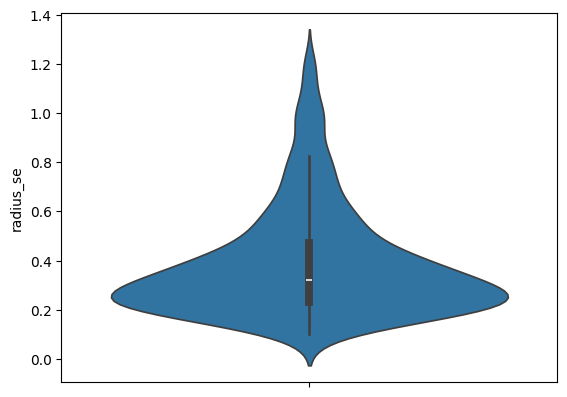

In [ ]:
print(filtered_df['radius_se'].describe())

# Plot histogram for filtered data
sns.violinplot(filtered_df['radius_se'],)

count    562.000000
mean       0.064045
std        0.031346
min        0.049960
25%        0.057800
50%        0.061515
75%        0.066110
max        0.787100
Name: fractal_dimension_mean, dtype: float64


<Axes: ylabel='fractal_dimension_mean'>

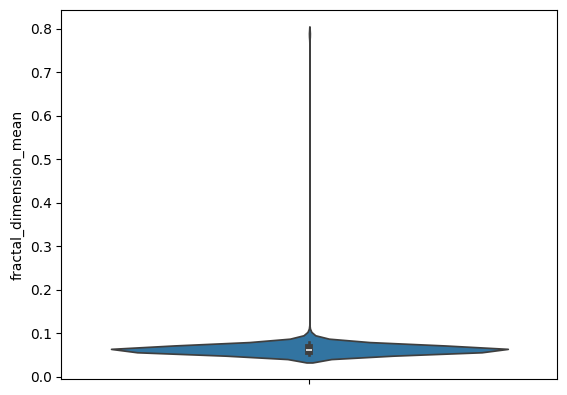

In [ ]:
print(filtered_df['fractal_dimension_mean'].describe())

# Plot histogram for filtered data
sns.violinplot(filtered_df['fractal_dimension_mean'],)

df.dtypes

In [ ]:
df.isna().any()

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [ ]:
# df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,-0.039769,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,0.074626,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


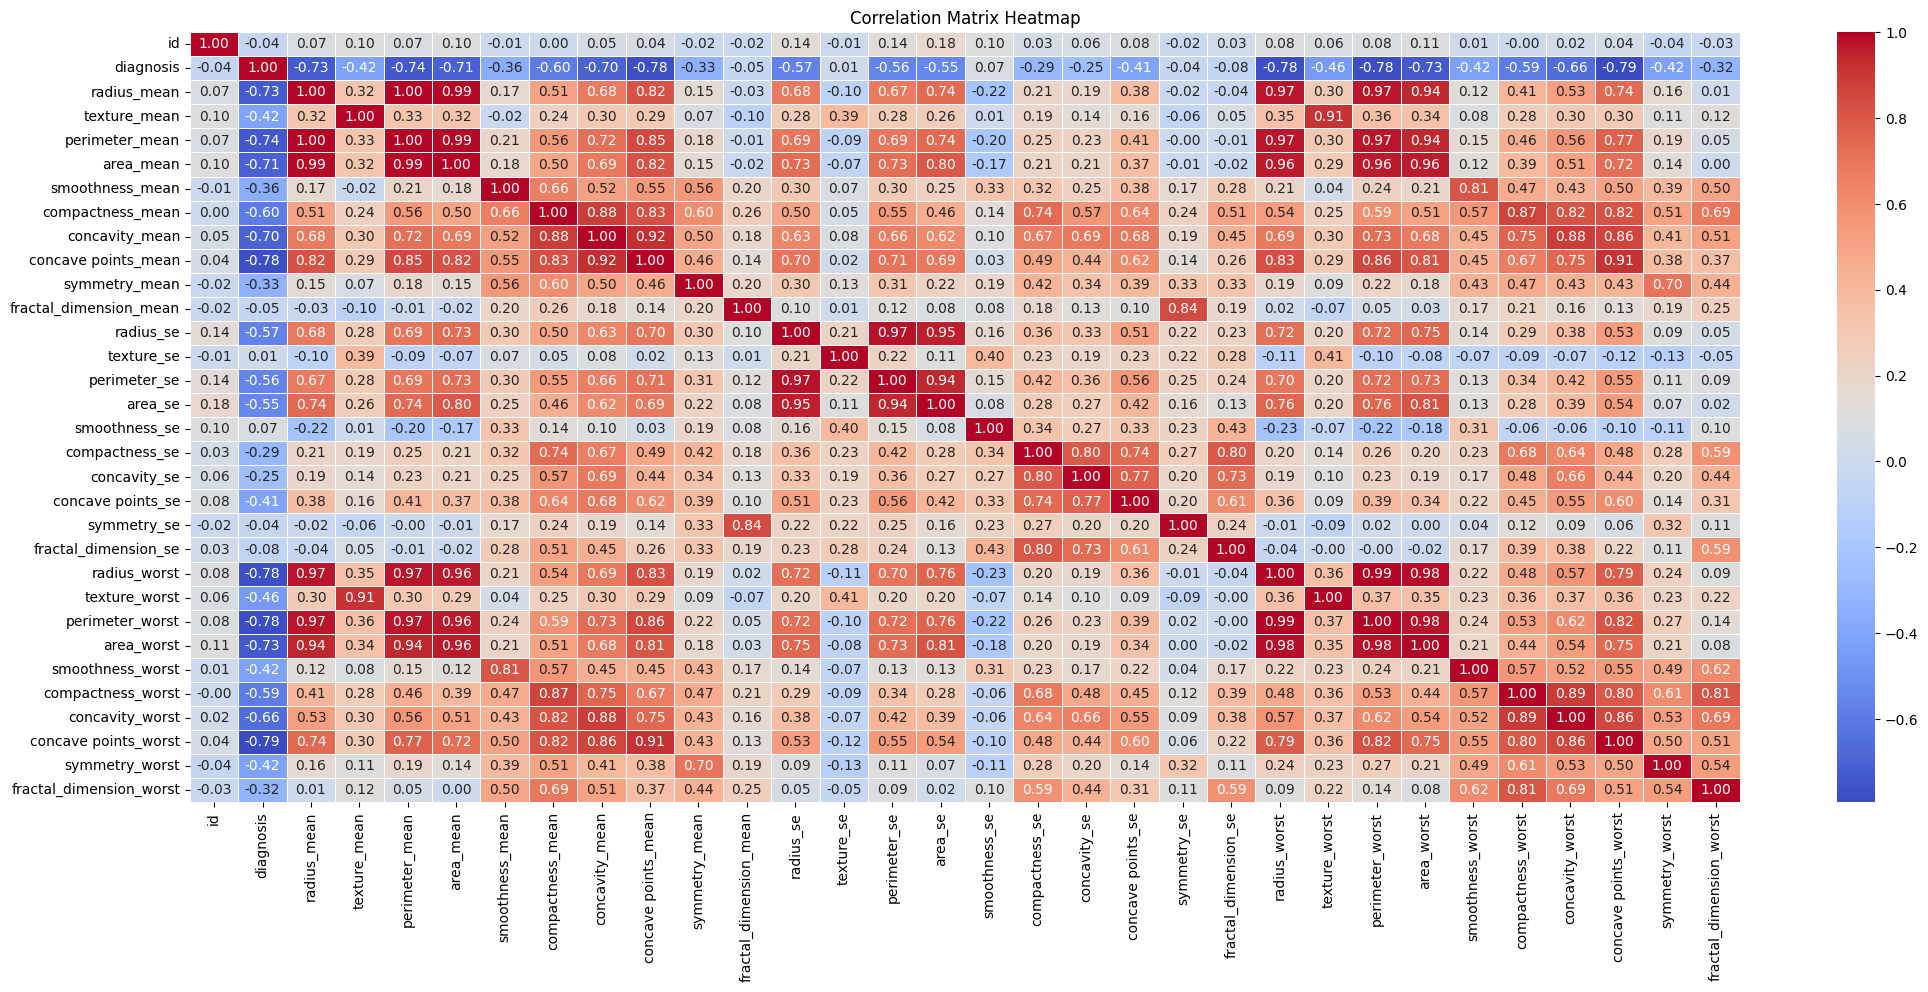

In [ ]:

correlation_matrix = df.corr()

plt.figure(figsize=(25, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df = df.dropna(axis = 1)
data = df.drop(['id','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','compactness_mean','concavity_mean','concave points_mean','compactness_se','perimeter_se','area_se','compactness_worst','concavity_worst','concave points_worst','smoothness_mean','texture_mean','smoothness_mean','smoothness_worst','texture_worst','texture_se'],axis=1)

In [ ]:
data.head()

,diagnosis,radius_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,1,17.99,0.2419,0.78710,1.0950,0.006399,0.05373,0.01587,0.30030,0.006193,0.4601,0.11890
1,1,20.57,0.1812,0.05667,0.5435,0.005225,0.01860,0.01340,0.01389,0.003532,0.2750,0.08902
2,1,19.69,0.2069,0.05999,0.7456,0.006150,0.03832,0.02058,0.02250,0.004571,0.3613,0.08758
3,1,11.42,0.2597,0.09744,0.4956,0.009110,0.05661,0.01867,0.05963,0.009208,0.6638,0.17300
4,1,20.29,0.1809,0.05883,0.7572,0.011490,0.05688,0.01885,0.01756,0.005115,0.2364,0.07678


In [ ]:
#In revised dataset
data.corr()

,diagnosis,radius_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.330499,-0.048971,-0.567239,0.067016,-0.253730,-0.408042,-0.039252,-0.077972,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.147741,-0.026733,0.679469,-0.222600,0.194204,0.376169,-0.023760,-0.042641,0.163953,0.007066
symmetry_mean,-0.330499,0.147741,1.000000,0.197367,0.303281,0.187321,0.342627,0.393298,0.332341,0.331786,0.699826,0.438413
fractal_dimension_mean,-0.048971,-0.026733,0.197367,1.000000,0.099451,0.082499,0.130118,0.103708,0.841083,0.192142,0.185629,0.251250
radius_se,-0.567239,0.679469,0.303281,0.099451,1.000000,0.164384,0.332648,0.513750,0.220864,0.227943,0.094431,0.049692
smoothness_se,0.067016,-0.222600,0.187321,0.082499,0.164384,1.000000,0.268685,0.328429,0.231216,0.427374,-0.107342,0.101480
concavity_se,-0.253730,0.194204,0.342627,0.130118,0.332648,0.268685,1.000000,0.771804,0.202325,0.727372,0.197788,0.439329
concave points_se,-0.408042,0.376169,0.393298,0.103708,0.513750,0.328429,0.771804,1.000000,0.202162,0.611044,0.143116,0.310655
symmetry_se,-0.039252,-0.023760,0.332341,0.841083,0.220864,0.231216,0.202325,0.202162,1.000000,0.242769,0.315585,0.109199
fractal_dimension_se,-0.077972,-0.042641,0.331786,0.192142,0.227943,0.427374,0.727372,0.611044,0.242769,1.000000,0.111094,0.591328


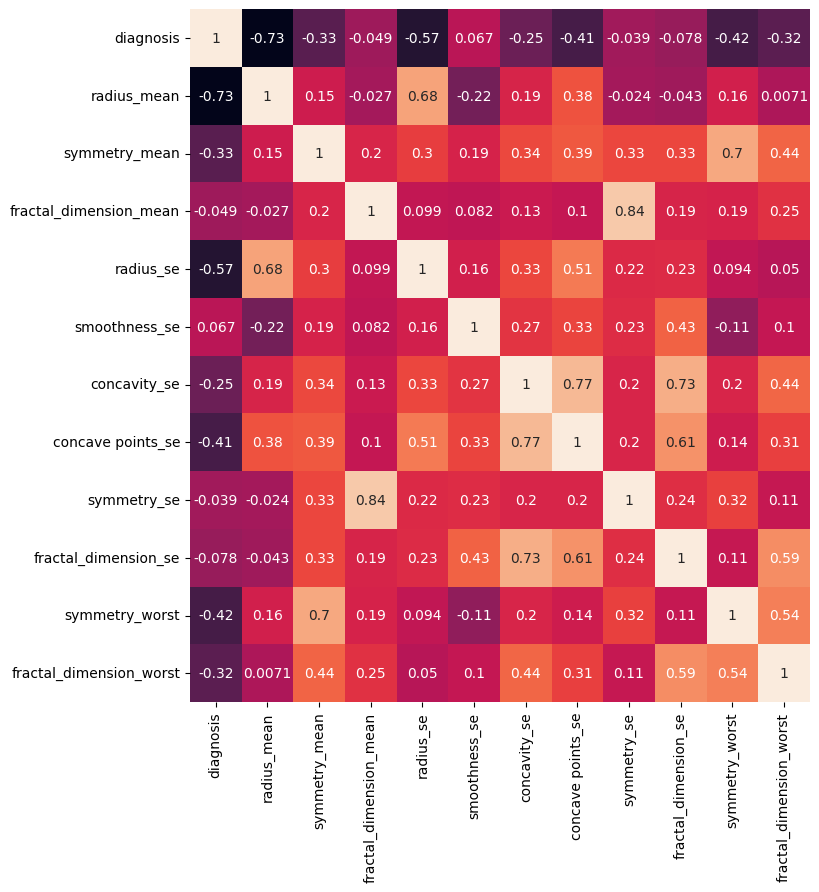

In [ ]:
corr_matrix = data.corr()

ig, ax = plt.subplots(figsize = (8,9))
ax = sns.heatmap(corr_matrix,
                annot = True,
                cbar = False)

In [ ]:
x = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()


# **train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455,), (114,))

# **SVM Classifier**

In [ ]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
linear_svm = LinearSVC()
svc.fit(x_train, y_train)
linear_svm.fit(x_train, y_train)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)

0.6285714285714286

In [ ]:
y_preds_svc = svc.predict(x_test)
y_preds_svc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [ ]:
y_preds_linear_svc = linear_svm.predict(x_test)
y_preds_linear_svc

array([1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

[[38  1]
 [ 5 70]]


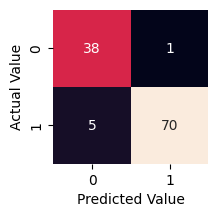

In [ ]:
print(confusion_matrix(y_preds_linear_svc, y_test))
def plot_confusion_matrix(y_preds_linear_svc, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_preds_linear_svc, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()
plot_confusion_matrix(y_preds_linear_svc, y_test)

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_preds_linear_svc, y_test)


0.8884606304270842

In [ ]:
print(classification_report(y_preds_linear_svc, y_test))

              precision    recall  f1-score   support

           1       0.88      0.97      0.93        39
           2       0.99      0.93      0.96        75

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'mcc': make_scorer(matthews_corrcoef)
}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv_results_svm = cross_validate(linear_svm, x, y, cv= 5 , scoring = scoring_metrics)


print("Cross-Validated Metrics for svm:")
print("Accuracy:", cv_results_svm['test_accuracy'].mean())
print("Precision:", cv_results_svm['test_precision'].mean())
print("Recall:", cv_results_svm['test_recall'].mean())
print("F1 Score:", cv_results_svm['test_f1'].mean())
print("MCC:", cv_results_svm['test_mcc'].mean())

Cross-Validated Metrics for svm:
Accuracy: 0.7291724887439839
Precision: 0.6014815112647931
Recall: 0.6919158361018825
F1 Score: 0.6133151059466848
MCC: 0.44956522211011496


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **EXTRA** **TREE**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(random_state=42)

ext.fit(x_train, y_train)

ExtraTreesClassifier(random_state=42)

In [ ]:
y_preds_ext = ext.predict(x_test)
y_preds_ext

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [ ]:
ext.score(x_train, y_train)

1.0

In [ ]:
y_preds_ext = ext.predict(x_test)
y_preds_ext

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

[[41  1]
 [ 2 70]]


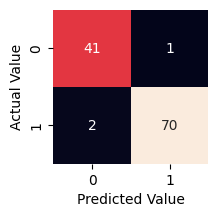

In [ ]:
print(confusion_matrix(y_preds_ext, y_test))
def plot_confusion_matrix(y_preds_ext, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_preds_ext, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()
plot_confusion_matrix(y_preds_ext, y_test)

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_preds_ext, y_test)

0.9438975339262832

In [ ]:
print(classification_report(y_preds_ext, y_test))

              precision    recall  f1-score   support

           1       0.95      0.98      0.96        42
           2       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv_results_ext = cross_validate(ext, x, y, cv= 5 , scoring = scoring_metrics)


print("Cross-Validated Metrics for svm:")
print("Accuracy:", cv_results_ext['test_accuracy'].mean())
print("Precision:", cv_results_ext['test_precision'].mean())
print("Recall:", cv_results_ext['test_recall'].mean())
print("F1 Score:", cv_results_ext['test_f1'].mean())
print("MCC:", cv_results_ext['test_mcc'].mean())

Cross-Validated Metrics for svm:
Accuracy: 0.9631268436578171
Precision: 0.9667453278428887
Recall: 0.93421926910299
F1 Score: 0.9496011405402733
MCC: 0.9215959138431609


# **ANN Classifeir**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an ANN classifier
ann_classifier = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42))

In [ ]:
from sklearn.metrics import classification_report
# Fit the ANN classifier to the training data
ann_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred_ann = ann_classifier.predict(x_test)

# Generate the classification report
classification_report_ann = classification_report(y_test, y_pred_ann)

# Print the classification report
print("Classification Report for ANN:")
print(classification_report_ann)


Classification Report for ANN:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        43
           2       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



[[42  1]
 [ 1 70]]


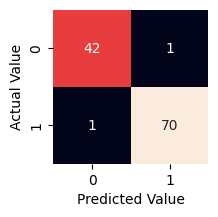

In [ ]:
print(confusion_matrix(y_pred_ann, y_test))
def plot_confusion_matrix(y_pred_ann, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_pred_ann, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()
plot_confusion_matrix(y_pred_ann, y_test)

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef( y_test, y_pred_ann)

0.9626596790042581

In [ ]:
cv_results_ann = cross_validate(ann_classifier, x, y, cv=5 , scoring = scoring_metrics)

print("Cross-Validated Metrics for ANN:")
print("Accuracy:", cv_results_ann['test_accuracy'].mean())
print("Precision:", cv_results_ann['test_precision'].mean())
print("Recall:", cv_results_ann['test_recall'].mean())
print("F1 Score:", cv_results_ann['test_f1'].mean())
print("MCC:", cv_results_ann['test_mcc'].mean())

Cross-Validated Metrics for ANN:
Accuracy: 0.9736686849868033
Precision: 0.9758250276854927
Recall: 0.9528239202657808
F1 Score: 0.9640172166427547
MCC: 0.9436300860681588


# **XGBOOST**

In [ ]:
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Recode the target variable for binary classification
y_binary = (y == 1).astype(int)

# Create an XGBoost classifier
xgboost_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Define scoring metrics
# Perform 5-fold cross-validation
cv_results_xgboost = cross_validate(xgboost_classifier, x, y_binary, cv=5, scoring=scoring_metrics)

# Print the cross-validated scores for XGBoost
print("Cross-Validated Metrics for XGBoost:")
print("Accuracy:", cv_results_xgboost['test_accuracy'].mean())
print("Precision:", cv_results_xgboost['test_precision'].mean())
print("Recall:", cv_results_xgboost['test_recall'].mean())
print("F1 Score:", cv_results_xgboost['test_f1'].mean())
print("MCC:", cv_results_xgboost['test_mcc'].mean())

Cross-Validated Metrics for XGBoost:
Accuracy: 0.9718987734823784
Precision: 0.97
Recall: 0.9576965669988926
F1 Score: 0.9628110942833246
MCC: 0.9415528741828307


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


In [ ]:
# prompt: write a code to make a classifiecation report of the xgboost by fit

xgboost_classifier.fit(x_train, y_train_encoded)
y_pred_xgboost = xgboost_classifier.predict(x_test)
# Generate the classification report
from sklearn.metrics import classification_report

classification_report_xgboost = classification_report(y_test_encoded, y_pred_xgboost)
print("Classification Report for XGBoost:")
print(classification_report_xgboost)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



[[40  2]
 [ 3 69]]


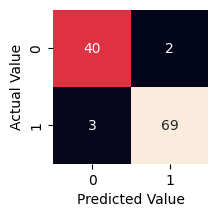

In [ ]:
print(confusion_matrix(y_pred_xgboost, y_test_encoded))
def plot_confusion_matrix(y_pred_xgboost, y_test_encoded):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_pred_xgboost, y_test_encoded),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()
plot_confusion_matrix(y_pred_xgboost, y_test_encoded)

# **voting classiifer**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [ ]:
svm_classifier = SVC(gamma='auto', probability=True)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
xgboost_classifier = XGBClassifier(n_estimators=100, random_state=42)
vote_soft = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)])
vote_soft.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_preds = vote_soft.predict(X_test_scaled)

# # Create a list with the estimator
# estimators = [('LGBM', lgbm_classifier)]
# # Voting Classifier with hard voting

# Evaluate the performance of the Voting Classifier
accuracy_voting_soft = accuracy_score(y_test, y_preds)
precision_voting = precision_score(y_test, y_preds,average = 'weighted')
recall_voting = recall_score(y_test, y_preds,average = 'weighted')
f1_voting = f1_score(y_test, y_preds,average = 'weighted')
mcc_voting = matthews_corrcoef(y_test, y_preds)

# Print Voting Classifier results for SVM, XGBoost AND ANN
print("\nVoting Classifier results (SOFT) - svc,ann and xgb: ")
print("Accuracy:", accuracy_voting_soft)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_voting)
print("MCC:", mcc_voting)


Voting Classifier results (SOFT) - svc,ann and xgb: 
Accuracy: 0.9736842105263158
Precision: 0.97475106685633
Recall: 0.9736842105263158
F1 Score: 0.9734808562744625
MCC: 0.9447329926514414


In [ ]:
svm_classifier = SVC(gamma='auto', probability=True)
# ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=32)
# xgboost_classifier = XGBClassifier(n_estimators=100, random_state=52)
vote_hard = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)])
vote_hard.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_preds = vote_hard.predict(X_test_scaled)

# Evaluate the performance of the Voting Classifier
accuracy_voting_hard = accuracy_score(y_test, y_preds,)
precision_voting_hard = precision_score(y_test, y_preds,)
recall_voting_hard = recall_score(y_test, y_preds,)
f1_voting_hard = f1_score(y_test, y_preds)
mcc_voting_hard = matthews_corrcoef(y_test, y_preds)

# Print Voting Classifier results for SVM, XGBoost AND ANN
print("\nVoting Classifier results (Hard) - svc,ann and xgb: ")
print("Accuracy:", accuracy_voting_hard)
print("Precision:", precision_voting_hard)
print("Recall:", recall_voting_hard)
print("F1 Score:", f1_voting_hard)
print("MCC:", mcc_voting_hard)


Voting Classifier results (Hard) - svc,ann and xgb: 
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9302325581395349
F1 Score: 0.963855421686747
MCC: 0.9447329926514414


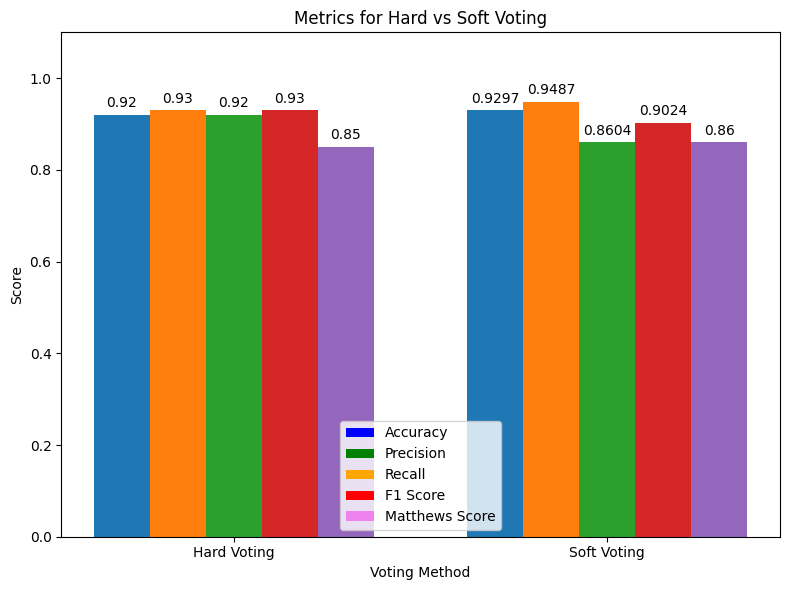

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
labels = ['Hard Voting', 'Soft Voting']
accuracies = [0.92, 0.9297]
precisions = [0.93, 0.9487]
recalls = [0.92, 0.8604]
f1scores = [0.93, 0.9024]
mathewsscore = [0.85, 0.86]

bar_width = 0.15  # Adjust the width of the bars
index = np.arange(len(labels))  # Index for the x-axis

plt.figure(figsize=(8, 6))

# Plot bars for each metric
plt.bar(index - 2*bar_width, accuracies, bar_width, label='Accuracy', color='blue')
plt.bar(index - bar_width, precisions, bar_width, label='Precision', color='green')
plt.bar(index, recalls, bar_width, label='Recall', color='orange')
plt.bar(index + bar_width, f1scores, bar_width, label='F1 Score', color='red')
plt.bar(index + 2*bar_width, mathewsscore, bar_width, label='Matthews Score', color='violet')

# Add labels, title, and legend
plt.xlabel('Voting Method')
plt.ylabel('Score')
plt.title('Metrics for Hard vs Soft Voting')
plt.xticks(index, labels)
plt.ylim(0, 1.1)  # Set the y-axis limit between 0 and 1.1
plt.legend()

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

# Add labels to the bars
for idx, metric in enumerate([accuracies, precisions, recalls, f1scores, mathewsscore]):
    add_labels(plt.bar(index + (idx - 2)*bar_width, metric, bar_width))

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler


# Define classifiers
svm_classifier = SVC(gamma='auto', probability=True)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
xgboost_classifier = XGBClassifier(n_estimators=100, random_state=42)
# vote_soft = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)])

# Create a VotingClassifier
# vote_soft = VotingClassifier(estimators=[('SVC', svm_classifier), ('Ext', ext_classifier),('lgb',lgbm_classifier)], voting='soft')
# vote_soft = VotingClassifier(estimators=[('SVC', svm_classifier), ('Ext', ext_classifier),('lgb',lgbm_classifier)], voting='soft')
vote_hard = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)],voting='hard')


# Fit the classifiers
# vote_soft.fit(X_train_scaled, y_train)
vote_hard.fit(X_train_scaled, y_train)

# Make predictions on the test set
# y_preds_soft = vote_soft.predict(X_test_scaled)
y_preds_hard = vote_hard.predict(X_test_scaled)

# Perform cross-validation
kfold = KFold(n_splits=10, shuffle=True,)
# cross_val_score_soft = cross_val_score(vote_soft, x, y, cv=kfold, scoring= scoring_metrics)
cross_val_score_hard = cross_validate(vote_hard, x, y, cv=kfold, scoring= scoring_metrics)

print("\nVoting Classifier results (Hard) - svc,ann and xgb: ")
print("Accuracy:", accuracy_voting_hard)
print("Precision:", precision_voting_hard)
print("Recall:", recall_voting_hard)
print("F1 Score:", f1_voting_hard)
print("MCC:", mcc_voting_hard)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p


Voting Classifier results (Hard) - svc,ann and xgb: 
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9302325581395349
F1 Score: 0.963855421686747
MCC: 0.9447329926514414


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
vote_soft = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)])
vote_soft.fit(X_train_scaled, y_train)
y_preds_soft = vote_soft.predict(X_test_scaled)
cross_val_score_soft = cross_validate(vote_soft, x, y, cv=kfold, scoring= scoring_metrics)


print("\nVoting Classifier results (soft) - svc,ann and xgb: ")
print("Accuracy:", accuracy_voting_soft)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_voting)
print("MCC:", mcc_voting)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p


Voting Classifier results (soft) - svc,ann and xgb: 
Accuracy: 0.9736842105263158
Precision: 0.97475106685633
Recall: 0.9736842105263158
F1 Score: 0.9734808562744625
MCC: 0.9447329926514414


In [ ]:
input_data = (17.99,0.2419,0.78710,1.09500,0.06399,0.006193,0.4601,0.11890)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc.predict(input_data_reshaped)
print(prediction)

if(prediction == 1):
    print("the diagnosis is beningn")
else:
     print("the diagnosis is malignant")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but SVC is expecting 31 features as input.

In [ ]:
# prompt: import pickle

import pickle

In [ ]:
with open('breast svc.pkl', 'wb') as file:
    pickle.dump(svc, file)

file

In [ ]:
import streamlit as st
import numpy as np
from sklearn.svm import SVC

# Load your trained SVC model (replace 'your_model.pkl' with the actual file)
# import pickle
with open('breast svc.pkl', 'rb') as f:
     svc = pickle.load(f)

# Streamlit app
st.title("Breast Cancer Diagnosis Prediction")

# Input fields
radius_mean = st.number_input("Radius Mean")
texture_mean = st.number_input("Texture Mean")
perimeter_mean = st.number_input("Perimeter Mean")
area_mean = st.number_input("Area Mean")
smoothness_mean = st.number_input("Smoothness Mean")
compactness_mean = st.number_input("Compactness Mean")
concavity_mean = st.number_input("Concavity Mean")
concave_points_mean = st.number_input("Concave Points Mean")

# Predict button
if st.button("Predict"):
    input_data = (radius_mean, texture_mean, perimeter_mean, area_mean,
                  smoothness_mean, compactness_mean, concavity_mean, concave_points_mean)
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    prediction = svc.predict(input_data_reshaped)

    if prediction == 1:
        st.write("The diagnosis is benign.")
    else:
        st.write("The diagnosis is malignant.")
